# NOAA GOES-16 Data with Pangeo

In [11]:
import s3fs
import h5py
import numpy as np
import xarray as xr
import dask
import dask.array as dsa
import tqdm
from matplotlib import pyplot as plt
import pickle

## Create a Dask Distributed Cluster

This uses spot instances.

If executing from a different environment, replace this with a different type of dask cluster (e.g. `LocalCluster`).

In [2]:
import dask_gateway
gateway = dask_gateway.Gateway()
options = gateway.cluster_options()
options.worker_memory = 24

In [45]:
cluster = gateway.new_cluster(options)
cluster

In [61]:
from dask.distributed import Client
cluster.scale(30)
client = Client(cluster)
client

Client Scheduler: gateway://traefik-icesat2-prod-dask-gateway.icesat2-prod:80/icesat2-prod.a4f262e0a3b24e6cb6cfe7c510235291 Dashboard: https://aws-uswest2.pangeo.io/services/dask-gateway/clusters/icesat2-prod.a4f262e0a3b24e6cb6cfe7c510235291/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


## List the Files from the Bucket

In [13]:
fs = s3fs.S3FileSystem(anon=True)
fs

Listing all the files from s3 takes a few minutes.

In [10]:
# cache the file listing to speed things up
try:
    with open('all_files.pkl', 'rb') as f:
        all_files = pickle.load(f)
except FileNotFoundError:
    base = 'noaa-goes16/ABI-L2-RRQPEF/2020/'
    top_level_dirs = fs.ls(base)
    all_files = []
    for tld in tqdm.tqdm(top_level_dirs):
        all_files.append(fs.find(tld))
    with open('all_files.pkl', 'wb') as f:
        pickle.dump(all_files, f)
        
flat_list = []
for sublist in all_files:
    for item in sublist:
        flat_list.append(item)
len(flat_list)

29059

## Examine a single file

In [80]:
tbounds0 = ds_example.time_bounds.values

In [81]:
example_url = flat_list[1]
f = fs.open(example_url)
ds_example = xr.open_dataset(f, decode_cf=True)
ds_example

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_lat_bounds: 2, number_of_rainfall_rate_bounds: 2, number_of_time_bounds: 2, x: 5424, y: 5424)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.151844 ... -0.151844
  * x                                       (x) float32 -0.151844 ... 0.151844
    y_image                                 float32 ...
    x_image                                 float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    solar_zenith_angle                      float32 ...
    latitude                                float32 ...
    accounted_rainfall_rate                 float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_lat_bounds, number_of_rainfall_rate_bounds, number_of_time_bounds
Data variables:
    RRQPE                                   (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    nominal_satellite_subpoint_lat          float32 ...
    nominal_satellite_subpoint_lon          float32 ...
    nominal_satellite_height                float32 ...
    geospatial_lat_lon_extent               float32 ...
    total_pixels_with_rain                  float64 ...
    total_rain_volume                       float32 ...
    total_pixels_with_successful_retrieval  float64 ...
    rainfall_rate_outlier_pixel_count       float64 ...
    minimum_rainfall_rate                   float32 ...
    maximum_rainfall_rate                   float32 ...
    mean_rainfall_rate                      float32 ...
    standard_deviation_rainfall_rate        float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
    retrieval_local_zenith_angle_bounds     (number_of_LZA_bounds) float32 ...
    quantitative_local_zenith_angle_bounds  (number_of_LZA_bounds) float32 ...
    solar_zenith_angle_bounds               (number_of_SZA_bounds) float32 ...
    latitude_bounds                         (number_of_lat_bounds) float32 ...
    accounted_rainfall_rate_bounds          (number_of_rainfall_rate_bounds) float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
Attributes:
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_site:           NSOF
    production_environment:    OE
    spatial_resolution:        2km at nadir
    orbital_slot:              GOES-East
    platform_ID:               G16
    instrument_type:           GOES R Series Advanced Baseline Imager
    scene_id:                  Full Disk
    instrument_ID:             FM1
    dataset_name:              OR_ABI-L2-RRQPEF-M6_G16_s20200010010216_e20200...
    iso_series_metadata_id:    3a3268a0-b006-11e1-afa6-0800200c9a66
    title:                     ABI L2 Rainfall Rate - Quantitative Precipitat...
    summary:                   The Rainfall Rate - Quantitative Precipitation...
    keywords:                  ATMOSPHERE > PRECIPITATION > PRECIPITATION RATE
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Ear...
  

In [78]:
ds_example.RRQPE

<xarray.DataArray 'RRQPE' (y: 5424, x: 5424)>
[29419776 values with dtype=float32]
Coordinates:
    t                                datetime64[ns] 2020-01-01T00:05:07.05408...
  * y                                (y) float32 0.151844 0.151788 ... -0.151844
  * x                                (x) float32 -0.151844 ... 0.151844
    y_image                          float32 0.0
    x_image                          float32 0.0
    retrieval_local_zenith_angle     float32 90.0
    quantitative_local_zenith_angle  float32 70.0
    solar_zenith_angle               float32 180.0
    latitude                         float32 60.0
    accounted_rainfall_rate          float32 1.0
Attributes:
    long_name:            ABI L2+ Rainfall Rate - Quantitative Precipitation ...
    standard_name:        rainfall_rate
    valid_range:          [ 0 -6]
    units:                mm h-1
    resolution:           y: 0.000056 rad x: 0.000056 rad
    grid_mapping:         goes_imager_projection
    cell_methods:         latitude: point (good quality pixel produced) retri...
    ancillary_variables:  DQF

In [79]:
ds_example.RRQPE.encoding

{'chunksizes': (226, 226),
 'fletcher32': False,
 'shuffle': False,
 'zlib': True,
 'complevel': 1,
 'source': '<File-like object S3FileSystem, noaa-goes16/ABI-L2-RRQPEF/2020/001/00/OR_ABI-L2-RRQPEF-M6_G16_s20200010000216_e20200010009524_c20200010010034.nc>',
 'original_shape': (5424, 5424),
 'dtype': dtype('int16'),
 '_Unsigned': 'true',
 '_FillValue': array([65535], dtype=uint16),
 'scale_factor': array([0.00152602], dtype=float32),
 'add_offset': array([0.], dtype=float32),
 'coordinates': 'latitude retrieval_local_zenith_angle quantitative_local_zenith_angle solar_zenith_angle t y x'}

In [58]:
def load_data(url):
    """Extract just the data from a single file."""
    f = fs.open(url)
    # handles decoding of the data automatically, e.g. scaling, units, etc
    ds = xr.open_dataset(f) 
    return ds['RRQPE'].values

In [57]:
data0 = load_data(example_url)
np.nansum(data0)

3618519.0

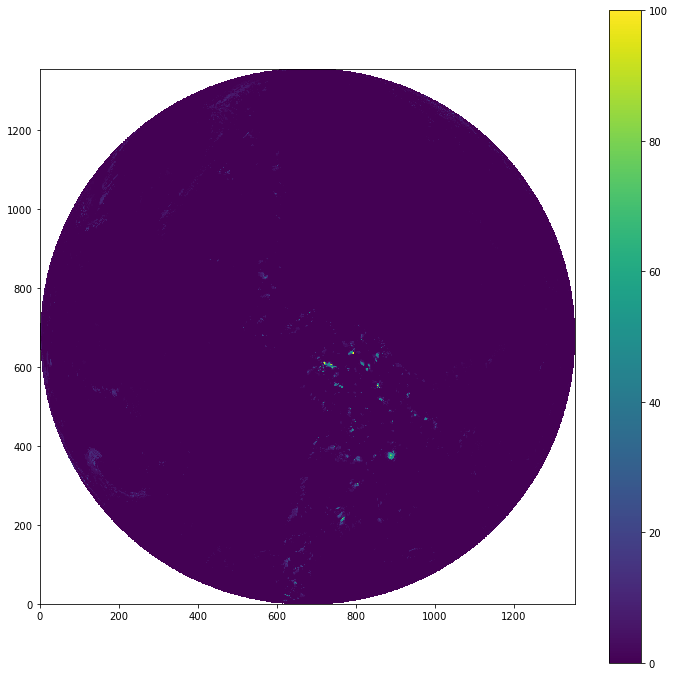

In [59]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'aspect': 'equal'})
pc = ax.pcolormesh(np.ma.masked_invalid(data0)[::4, ::-4].transpose())
plt.colorbar(pc)

## Create a Dask Array

This uses dask's delayed syntax to load the data lazily.

In [60]:
%%time

shape = data0.shape
dtype = data0.dtype
all_arrays = []
for url in flat_list:
    array = dsa.from_delayed(dask.delayed(load_data)(url),
                             shape, dtype=dtype)
    all_arrays.append(array)
all_data = dsa.stack(all_arrays)
all_data

CPU times: user 5.2 s, sys: 109 ms, total: 5.31 s
Wall time: 5.3 s


,Array,Chunk
Bytes,3.42 TB,117.68 MB
Shape,"(29059, 5424, 5424)","(1, 5424, 5424)"
Count,87177 Tasks,29059 Chunks
Type,float32,numpy.ndarray


## Compute the total sum

In [62]:
%%time 
all_data_sum = dsa.nansum(all_data, axis=0).compute()

CPU times: user 39.1 s, sys: 779 ms, total: 39.9 s
Wall time: 11min 17s


In [64]:
cluster.scale(0)

## Plot

In [84]:
# units are in mm/hr, but at 10 min sample, so we must divide by 6 for hourly measure
total_mm = all_data_sum / 6

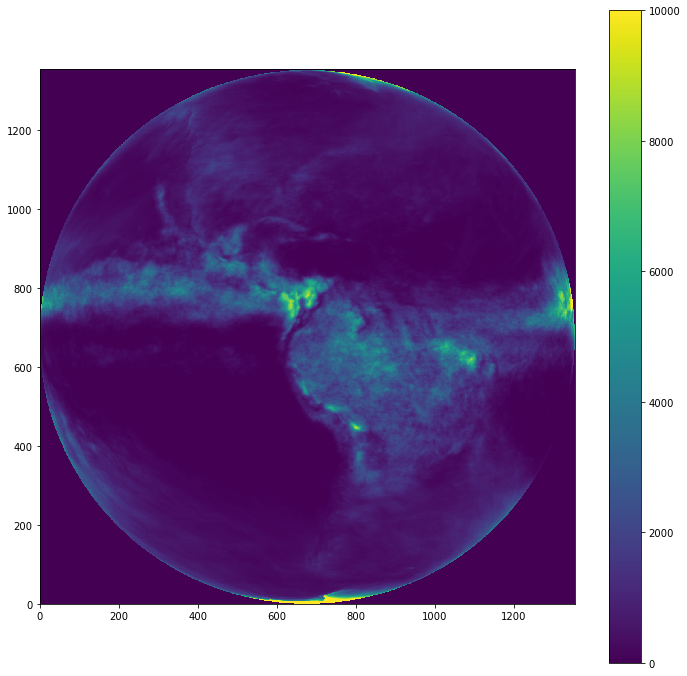

In [86]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'aspect': 'equal'})
pc = ax.pcolormesh(total_mm[::-4, ::4])
plt.colorbar(pc)
pc.set_clim([0, 10000])

In [87]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError
